<h4>Lab No 6</h4>
<h4 align="right">Utkarsh Bhangale<br>2020802124</h4>

In [1]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.2 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [11]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Market_Basket_Optimisation.csv to Market_Basket_Optimisation.csv


In [8]:
data = pd.read_csv('/content/Market_Basket_Optimisation.csv', header=None) 
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Convert the data into a list of lists
transactions = []
for i in range(data.shape[0]):
    transactions.append([str(data.values[i,j]) for j in range(data.shape[1]) if str(data.values[i,j])!='nan'])


In [12]:
# Use the TransactionEncoder to transform the data into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [13]:
# Use the apriori function to find frequent itemsets with a minimum support of 0.01
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

In [14]:
# Generate association rules with a minimum confidence of 0.5
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

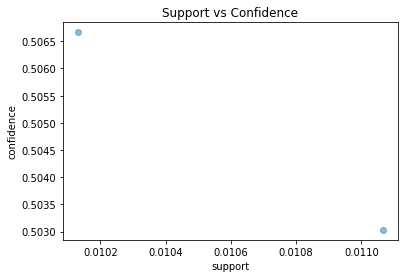

In [15]:
import matplotlib.pyplot as plt

# Create a scatter plot of support vs. confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [37]:
# without using library
import csv
from collections import defaultdict

# Load the dataset
with open('/content/Market_Basket_Optimisation.csv', 'r') as f:
    reader = csv.reader(f)
    transactions = list(reader)

# Define a function to generate candidate itemsets of size k
def generate_candidate_itemsets(k, itemset):
    candidate_itemsets = set()
    for i in range(len(itemset)):
        for j in range(i+1, len(itemset)):
            union = itemset[i].union(itemset[j])
            if len(union) == k:
                candidate_itemsets.add(union)
    return candidate_itemsets

# Define a function to calculate the support of an itemset
def calculate_support(itemset):
    count = 0
    for transaction in transactions:
        if itemset.issubset(transaction):
            count += 1
    return count / len(transactions)

# Define a function to generate frequent itemsets using the Apriori algorithm
def apriori(min_support):
    # Generate frequent itemsets of size 1
    frequent_itemsets = []
    support_data = {}
    for transaction in transactions:
        for item in transaction:
            if item not in support_data:
                support_data[frozenset([item])] = 0
            support_data[frozenset([item])] += 1 / len(transactions)
    
    for key, value in support_data.items():
        if value >= min_support:
            frequent_itemsets.append(key)
    
    # Generate frequent itemsets of size k > 1
    k = 2
    while True:
        candidate_itemsets = generate_candidate_itemsets(k, frequent_itemsets)
        if not candidate_itemsets:
            break
        
        new_frequent_itemsets = []
        for candidate in candidate_itemsets:
            support = calculate_support(candidate)
            if support >= min_support:
                new_frequent_itemsets.append(candidate)
                support_data[candidate] = support
        
        frequent_itemsets = new_frequent_itemsets
        k += 1
    
    return frequent_itemsets, support_data